In [1]:
import numpy as np
import matplotlib.pyplot as plt
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)


In [2]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[3.81495303],
       [3.10450789]])

In [3]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict


array([[ 3.81495303],
       [10.02396881]])

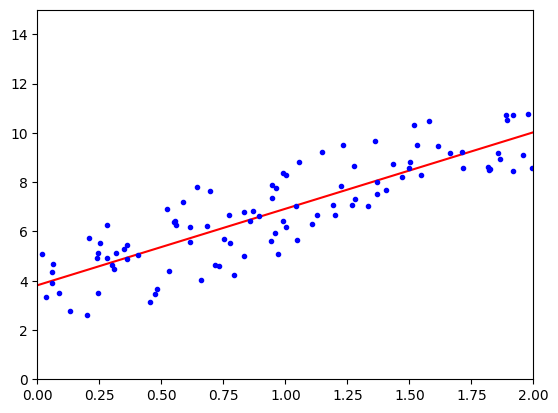

In [4]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [5]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_


(array([3.81495303]), array([[3.10450789]]))

In [6]:
lin_reg.predict(X_new)


array([[ 3.81495303],
       [10.02396881]])

In [7]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd


array([[3.81495303],
       [3.10450789]])

In [8]:
np.linalg.pinv(X_b).dot(y)


array([[3.81495303],
       [3.10450789]])

In [9]:
#GRADIENT DESCENT

In [10]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100
theta = np.random.randn(2,1) # random initialization
for iteration in range(n_iterations):
 gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
 theta = theta - eta * gradients
theta

array([[3.81495303],
       [3.10450789]])

In [ ]:
#STOCHASTIC GRADIENT DESCENT

In [12]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters
def learning_schedule(t):
 return t0 / (t + t1)
theta = np.random.randn(2,1) # random initialization
for epoch in range(n_epochs):
     for i in range(m):
         random_index = np.random.randint(m)
         xi = X_b[random_index:random_index+1]
         yi = y[random_index:random_index+1]
         gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
         eta = learning_schedule(epoch * m + i)
         theta = theta - eta * gradients
theta

array([[3.88627218],
       [3.08753776]])

In [13]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())
sgd_reg.intercept_, sgd_reg.coef_


(array([3.79266192]), array([3.11764278]))

In [ ]:
#POLYNOMIAL REGRESSION

In [14]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)


In [15]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]


array([-2.81760576])

In [16]:
X_poly[0]


array([-2.81760576,  7.93890224])

In [17]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_


(array([2.04460038]), array([[1.00434848, 0.51011472]]))

In [18]:
#LEARNING CURVES

In [28]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
def plot_learning_curves(model, X, y):
 X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
 
 train_errors, val_errors = [], []
 for m in range(1, len(X_train)):
    model.fit(X_train[:m], y_train[:m])
    y_train_predict = model.predict(X_train[:m])
    y_val_predict = model.predict(X_val)
    train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")


In [ ]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)


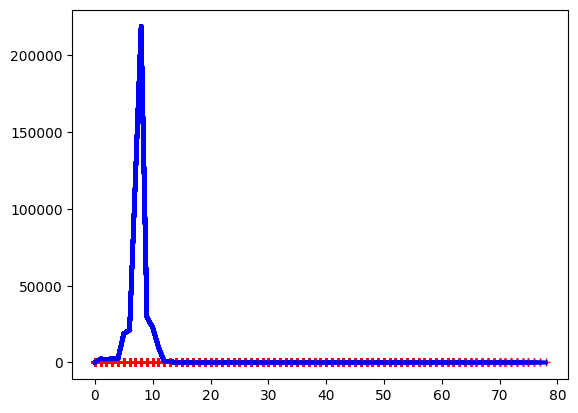

In [30]:
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline([
 ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
 ("lin_reg", LinearRegression()),
 ])
plot_learning_curves(polynomial_regression, X, y)


In [31]:
#RIDGE REGRESSION
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[4.76931382]])